# **<span style="color:cornflowerblue">Breast Cancer Diagnostic Features</span>**
# Principal Component Analysis 

We apply Principal Component Analysis (PCA) to the Breast Cancer Wisconsin Diagnostic dataset to show how dimensionality reduction can summarize complex clinical features into a small number of components while preserving most of the variance, and to visualize how these components separate malignant and benign tumors.

## Dataset

We use the Breast Cancer Wisconsin Diagnostic dataset from the UCI Machine Learning Repository, accessed through `sklearn.datasets.load_breast_cancer`.  
Each row corresponds to a breast mass, with 30 numeric features computed from digitized images of fine needle aspirates of the mass. The target variable is a binary label:

- 0: malignant
- 1: benign

## Objectives

1. Load and explore the dataset structure and distributions.
2. Standardize features so that PCA is not dominated by variables with large scales.
3. Apply PCA to:
   - Inspect the proportion of variance explained by each principal component.
   - Visualize the data in the space of the first two principal components.
4. Interpret the loadings of the first components to understand which original features contribute most to each axis.

## Methodology

1. **Data loading and cleaning**  
   - Load the dataset via scikit learn.  
   - Convert to a Pandas DataFrame for easier inspection.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load data
dataset = load_breast_cancer(as_frame=True)
X = dataset.data          # DataFrame with 30 features
y = dataset.target        # 0 malignant, 1 benign
feature_names = dataset.feature_names
target_names = dataset.target_names

# Make target readable
y = pd.Series(y, name="diagnosis")
y = y.map({0: "malignant", 1: "benign"})

print("Shape of X:", X.shape)
print("Number of features:", len(feature_names))
print("Target classes:", list(target_names))

Shape of X: (569, 30)
Number of features: 30
Target classes: [np.str_('malignant'), np.str_('benign')]


In [5]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y.head()

0    malignant
1    malignant
2    malignant
3    malignant
4    malignant
Name: diagnosis, dtype: object

2. **Preprocessing**  
   - Standardize all numerical features using `StandardScaler`.  
   - Keep the target label unchanged

In [8]:
# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nStandardized features (approx):")
print("  Mean:", np.round(X_scaled.mean(axis=0), 3))
print("  Std:", np.round(X_scaled.std(axis=0), 3))


Standardized features (approx):
  Mean: [-0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0.
  0. -0. -0.  0. -0.  0. -0. -0.  0.  0.  0. -0.]
  Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


PCA is sensitive to scale, so unscaled features with larger magnitude would artificially dominate the first components. Standardization removes this issue. We can see that all 30 features have mean values extremely close to zero and standard deviations equal to one. This indicates that the StandardScaler transformation worked correctly: no feature dominates, features become comparable. centering is correct (means is 0) and scaling is correct (unit standrad deviation).

3. **PCA fitting**  
   - Fit PCA on the standardized features.  
   - Inspect the explained variance ratio and cumulative variance.  
   - Select the number of components that explain at least 95 percent of total variance.  
   - Fit a 2 component PCA for visualization.

In [9]:
# 3. PCA to inspect explained variance
pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("\nExplained variance ratio for first 10 components:")
for i, v in enumerate(explained_variance_ratio[:10], start=1):
    print(f"  PC{i}: {v:.4f}")

threshold = 0.95
n_components_95 = np.searchsorted(cumulative_variance, threshold) + 1
print(f"\nNumber of components to reach {threshold*100:.0f}% variance: {n_components_95}")


Explained variance ratio for first 10 components:
  PC1: 0.4427
  PC2: 0.1897
  PC3: 0.0939
  PC4: 0.0660
  PC5: 0.0550
  PC6: 0.0402
  PC7: 0.0225
  PC8: 0.0159
  PC9: 0.0139
  PC10: 0.0117

Number of components to reach 95% variance: 10


We see the first Principal component PC1 explains about 44 percent of the total variance, which is quite high as a single dominant axis captures almost half of all meaningful variation in tumor morphology. The second Principal component PC2 adds about 19 percent additional variance. Combined, PC1 and PC2 explain roughly 63 percent, indicating that two underlying factors already summarize most of the structure in the data.

Reaching 95 percent explained variance requires 10 principal components. This shows that while the dataset has 30 raw features, most of the meaningful variability is concentrated in about one third of them. The remaining components add little incremental information in terms of variance.

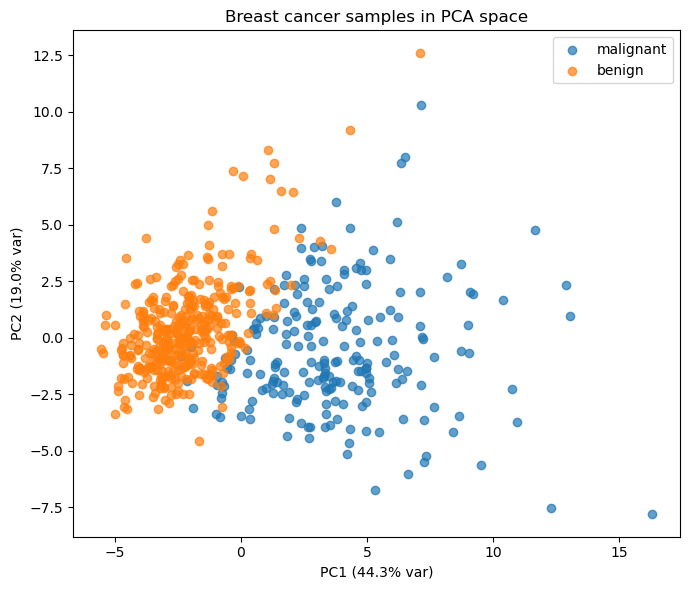

In [12]:
# 5. Fit 2 component PCA for visualization
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

pc1_var = pca_2d.explained_variance_ratio_[0]
pc2_var = pca_2d.explained_variance_ratio_[1]
# 6. 2D scatter plot of PC1 vs PC2
plt.figure(figsize=(7, 6))
labels = y.unique()

for label in labels:
    mask = (y == label).values
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        alpha=0.7,
        label=label
    )

plt.xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
plt.ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
plt.title("Breast cancer samples in PCA space")
plt.legend()
plt.tight_layout()
plt.show()

The plot shows how each tumor sample projects onto the first two principal components. These two axes capture about 63 percent of all variance in the dataset.

There is a clear but not perfect separation, and we can see that benign samples are more compactly grouped in this two dimensional space, as malignant samples are spread more widely which can reflect greater heterogeneity in malignant morphology.

PC1 is the primary axis. Higher PC1 values may help to identify more malignant cases.  


In [13]:
# 7. Inspect loadings for PC1 and PC2
loadings = pd.DataFrame(
    pca_2d.components_.T,
    index=feature_names,
    columns=["PC1", "PC2"]
)

loadings["abs_PC1"] = loadings["PC1"].abs()
loadings["abs_PC2"] = loadings["PC2"].abs()

top_k = 10
top_pc1 = loadings.sort_values("abs_PC1", ascending=False).head(top_k)
top_pc2 = loadings.sort_values("abs_PC2", ascending=False).head(top_k)

print("\nTop features contributing to PC1:")
print(top_pc1[["PC1"]])

print("\nTop features contributing to PC2:")
print(top_pc2[["PC2"]])



Top features contributing to PC1:
                           PC1
mean concave points   0.260854
mean concavity        0.258400
worst concave points  0.250886
mean compactness      0.239285
worst perimeter       0.236640
worst concavity       0.228768
worst radius          0.227997
mean perimeter        0.227537
worst area            0.224871
mean area             0.220995

Top features contributing to PC2:
                              PC2
mean fractal dimension   0.366575
fractal dimension error  0.280092
worst fractal dimension  0.275339
mean radius             -0.233857
compactness error        0.232716
mean area               -0.231077
worst radius            -0.219866
worst area              -0.219352
mean perimeter          -0.215181
smoothness error         0.204430


PC1 captures rather how big and irregular the tumor is, whereas PC2 captures rather fine scale morphology.

PCA helps to identify which morphological patterns matter most for distinguishing tumor types, but also atypical cases if we observe outliers.
Such insights can guide feature selection, domain research, or targeted clinical hypotheses.

PCA reduces high dimensionality, so it can be used for preprocessing for clustering or unsupervised learning and other more advanced modelling techniques.

# Bayesian Optimization for Hyperparameter Tuning in Clinical Risk Prediction

No let's train a Gradient Boosting classifier to predict whether a tumor is **benign** or **malignant**.

In [5]:
!pip3 install scikit-optimize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import (    roc_auc_score, accuracy_score, f1_score, classification_report)

from sklearn.ensemble import GradientBoostingClassifier

# Bayesian Optimization
from skopt import BayesSearchCV
from skopt.space import Integer, Real


   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   ---------------------------------------- 2/2 [scikit-optimize]



In [9]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


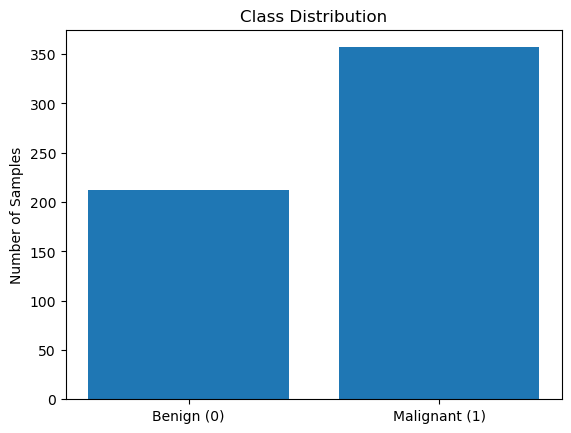

target
0    212
1    357
Name: count, dtype: int64

In [11]:
class_counts = y.value_counts().sort_index()

plt.figure()
plt.bar(["Benign (0)", "Malignant (1)"], class_counts.values)
plt.title("Class Distribution")
plt.ylabel("Number of Samples")
plt.show()

class_counts

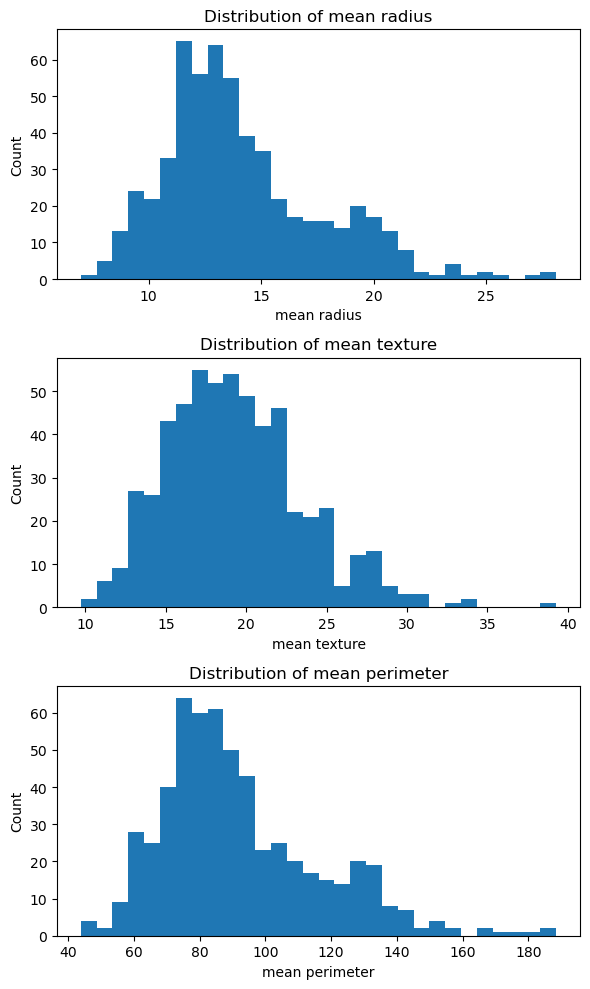

In [12]:
example_features = [
    "mean radius",
    "mean texture",
    "mean perimeter"
]

fig, axes = plt.subplots(len(example_features), 1, figsize=(6, 10))

for ax, feature in zip(axes, example_features):
    ax.hist(X[feature], bins=30)
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

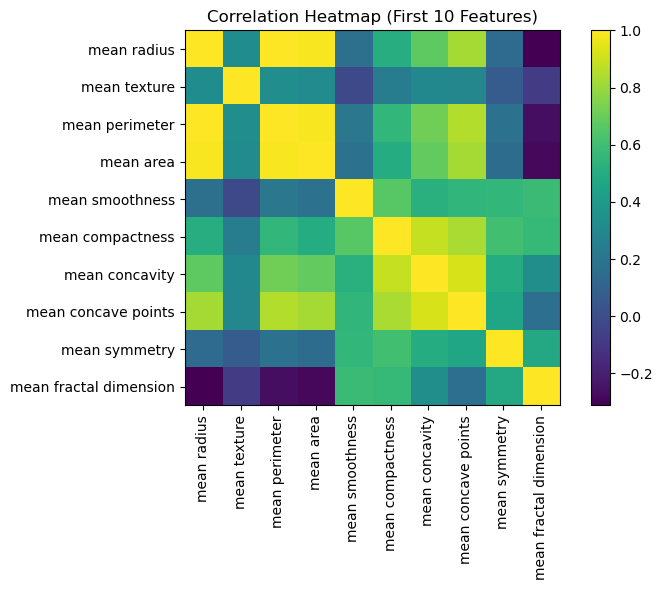

In [13]:
subset_features = list(X.columns[:10])  # first 10 features
corr = X[subset_features].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(subset_features)), subset_features, rotation=90)
plt.yticks(range(len(subset_features)), subset_features)
plt.title("Correlation Heatmap (First 10 Features)")
plt.colorbar()
plt.tight_layout()
plt.show()

We begin with a simple **Gradient Boosting Classifier** using default hyperparameters. 
This provides a reference point to evaluate the benefits of Bayesian optimization.

In [14]:
baseline_model = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("clf", GradientBoostingClassifier(random_state=42))
    ]
)
# Train & predict
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)
y_proba = baseline_model.predict_proba(X_test)[:, 1]

baseline_results = {
    "AUC": roc_auc_score(y_test, y_proba),
    "Accuracy": accuracy_score(y_test, y_pred),
    "F1": f1_score(y_test, y_pred)
}

baseline_results

{'AUC': 0.9907407407407408,
 'Accuracy': 0.956140350877193,
 'F1': 0.9659863945578231}

**AUC (Area Under ROC Curve)** measures how well the model separates malignant from benign tumors across all possible probability thresholds from 0.5 = no discriminative ability  or random guess. An AUC of 0.9907 indicates the model is almost perfectly ranking malignant cases above benign ones, which may be a sign of overfitting, unless the dataset is highly separable, which the breast cancer dataset is. So there is a very low chance of missing a malignant case due to poor ranking.

**Accuracy** is the proportion of total cases (benign + malignant) correctly classified: 95.6% accuracy indicates that the model gets the label right in ~96 out of 100 patients. High accuracy can be misleading if the dataset is imbalanced. Here, the cancer dataset has some imbalance (≈ 63% malignant), but not extreme. At ~96% accuracy, there a very few “wrong predictions” with low False positives and false negatives but accuracy alone cannot distinguish which errors are happening. 

**F1** balances: 
* Precision →  TP/(TP+FP)) finding all actual positives among all positives = Positive predictive value
* Recall → TP/(TP+FN) how many actual positives are found among all actual positives = Sensitivity
F1=2×(Precision+Recall)(Precision×Recall)​
F1 is high if both precision and recall are high.

Here F1 is high 0.966 so very few benign lesions are mistakenly classified as malignant and very few malignant lesions are missed.

<Figure size 640x480 with 0 Axes>

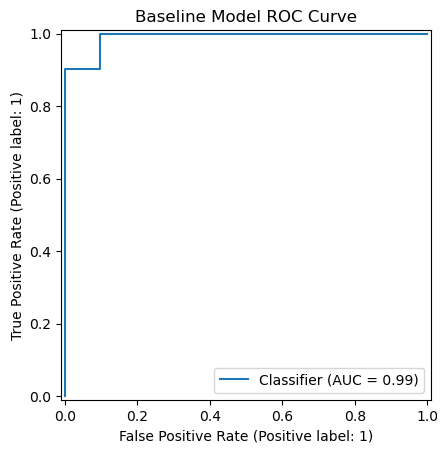

In [16]:
from sklearn.metrics import RocCurveDisplay
plt.figure()
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Baseline Model ROC Curve")
plt.show()

We tune the following hyperparameters of the Gradient Boosting model:

- `n_estimators` (50–300)
- `learning_rate` (log-uniform: 0.01–0.3)
- `max_depth` (1–5)
- `min_samples_split` (2–20)
- `min_samples_leaf` (1–20)

Bayesian optimization is a method for tuning hyperparameters by building a probabilistic model (a surrogate) that predicts how well different hyperparameter choices will perform. Instead of testing values blindly, it uses this model to decide which hyperparameters to try next, balancing exploration of new regions with exploitation of promising ones. After each trial, the surrogate is updated with the new result, becoming more accurate over time. This allows it to find near-optimal hyperparameters with far fewer evaluations than grid or random search.

In [18]:
search_spaces = {
    "clf__n_estimators": Integer(50, 300),
    "clf__learning_rate": Real(0.01, 0.3, prior="log-uniform"),
    "clf__max_depth": Integer(1, 5),
    "clf__min_samples_split": Integer(2, 20),
    "clf__min_samples_leaf": Integer(1, 20),
}

opt = BayesSearchCV(
    estimator=Pipeline([
        ("scaler", StandardScaler()),
        ("clf", GradientBoostingClassifier(random_state=42))
    ]),
    search_spaces=search_spaces,
    n_iter=30,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    refit=True
)
opt.fit(X_train, y_train)
opt.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

np.float64(0.9903244954491491)

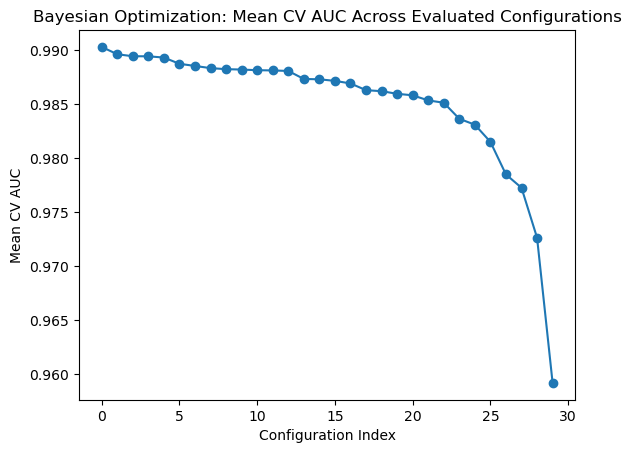

In [19]:
results_df = pd.DataFrame(opt.cv_results_)

# Sort by iteration (rank_test_score ascending for order, or use index)
results_df = results_df.sort_values("rank_test_score")

plt.figure()
plt.plot(results_df["mean_test_score"].values, marker="o")
plt.xlabel("Configuration Index")
plt.ylabel("Mean CV AUC")
plt.title("Bayesian Optimization: Mean CV AUC Across Evaluated Configurations")
plt.show()

The plot shows that Bayesian optimization quickly identified high-performing hyperparameter regions early on, with mean CV AUC staying consistently near 0.99 for most evaluated configurations. Toward later iterations, explored configurations performed worse, reflecting deliberate exploration of less promising parts of the search space.

In [22]:
optimized_model = opt.best_estimator_
y_pred_opt = optimized_model.predict(X_test)
y_proba_opt = optimized_model.predict_proba(X_test)[:, 1]

optimized_results = {
    "AUC": roc_auc_score(y_test, y_proba_opt),
    "Accuracy": accuracy_score(y_test, y_pred_opt),
    "F1": f1_score(y_test, y_pred_opt)
}

optimized_results

{'AUC': 0.9950396825396826,
 'Accuracy': 0.9649122807017544,
 'F1': 0.9726027397260274}

<Figure size 640x480 with 0 Axes>

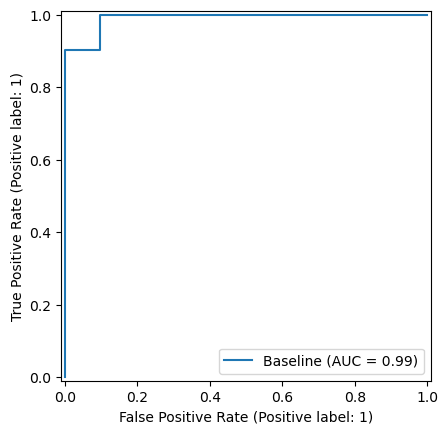

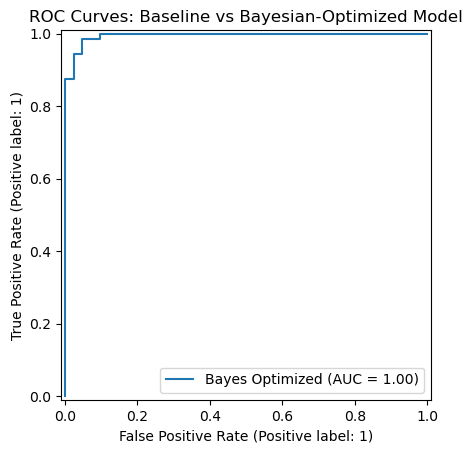

In [23]:
plt.figure()

# Baseline ROC
RocCurveDisplay.from_predictions(
    y_test, y_proba, name="Baseline"
)

# Optimized ROC (overlay)
RocCurveDisplay.from_predictions(
    y_test, y_proba_opt, name="Bayes Optimized"
)

plt.title("ROC Curves: Baseline vs Bayesian-Optimized Model")
plt.show()

In [24]:
comparison = pd.DataFrame(
    [baseline_results, optimized_results],
    index=["Baseline", "Bayes Optimized"]
)
comparison

,AUC,Accuracy,F1
Baseline,0.990741,0.956140,0.965986
Bayes Optimized,0.995040,0.964912,0.972603


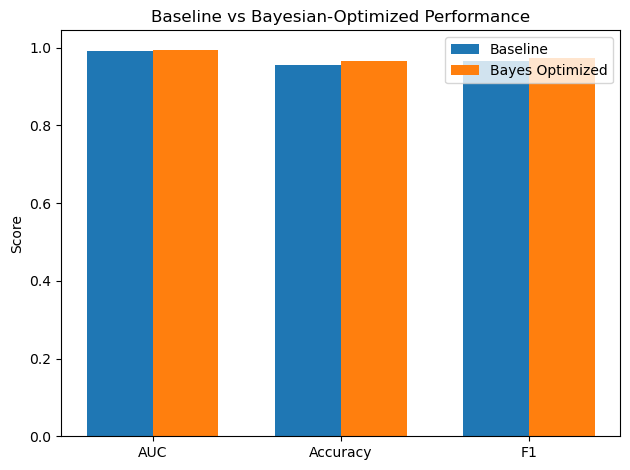

In [25]:
plt.figure()

metrics = ["AUC", "Accuracy", "F1"]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, [baseline_results[m] for m in metrics], width, label="Baseline")
plt.bar(x + width/2, [optimized_results[m] for m in metrics], width, label="Bayes Optimized")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Baseline vs Bayesian-Optimized Performance")
plt.legend()
plt.tight_layout()
plt.show()

The Bayesian-optimized model shows a small but meaningful improvement across all metrics compared to the baseline. AUC increases from 0.9907 → 0.9950, indicating even stronger separation between malignant and benign cases. Accuracy and F1 also improve, suggesting the model is making fewer both false positives and false negatives. Overall, Bayesian optimization fine-tuned the hyperparameters to yield a model that is slightly but consistently more reliable for clinical prediction.